# K Nearest Neighbors

###### Algorithm in Theory

The k-Nearest Neighbors (kNN) algorithm is arguably the simplest machine learning, KNN can be used for both classification and regression predictive problems. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function 
                h:X→Y 
                so that given an unseen observation x, 
                h(x) can confidently predict the corresponding output y. 
Building the model only consists of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset, it's “nearest neighbors”.

###### story of K
In the simplest classification setting, the algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction for. But instead of considering only a single neighbor we can consider an arbitary number of neighbors, this is where the name 'K Nearest Neighbors' comes from and the solution boils down to forming a majority voting between the K most similar instances to a given unseen observation.

In [5]:
try:
    import mglearn
except:
    !pip install mglearn
import matplotlib.pyplot as plt

(506, 13)


In [10]:
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)

(506, 104)


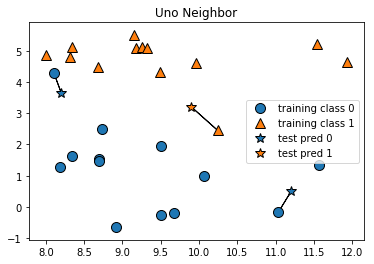

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.title("Uno Neighbor")
plt.show()

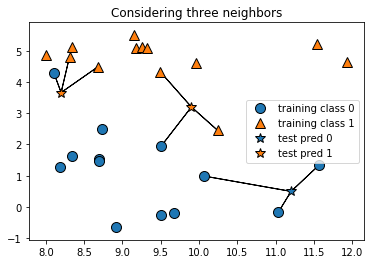

In [11]:
# Majority vorting in case of K = 3
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.title("Considering three neighbors")
plt.show()

###### Distnace Measure

Similarity is defined according to a distance metric between two data points. The k-nearest-neighbor classifier is commonly based on the Euclidean distance between a test sample and the specified training samples.

Let x_i be an input sample with 'p' features (x_i1,x_i2,...,x_ip)

'n' be the total number of input samples (i = 1, 2,..., n).

The Euclidean distance between samples x_i and x_l is is defined as:
$$d(x_i, x_l) = \sqrt{(x_i1 - x_l1)^2 + (x_i2 - x_l2)^2 + .... + (x_ip - x_lp)^2}$$
Sometimes other measures can be more suitable for a given setting and include the Manhattan, Chebyshev and Hamming distance

###### Algorithm psuedo code

STEP 1: Choose the number K of neighbors

STEP 2: Take the K nearest neighbors of the new data point, according to your distance metric

STEP 3: Among these K neighbors, count the number of data points to each category

STEP 4: Assign the new data point to the category where you counted the most neighbors


In [30]:
# importing dependencies
from collections import Counter
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
# loading iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
target_names = {i:target_names[i] for i in range(len(target_names))}
target_index = {val:key for key,val in target_names.items()}
print("Dimensions of Data:", X.shape)
print(feature_names)
print(X[:5, :])
print(y[:5])

Dimensions of Data: (150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
[0 0 0 0 0]


In [32]:
X = pd.DataFrame(X, columns = feature_names)
print(X.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.198667  
std            0.763161  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [33]:
# Checking number of instances belonging to each Species
value_counts = Counter(y)
for key, val in value_counts.items():
    print(target_names[key], ":", val)

setosa : 50
versicolor : 50
virginica : 50


In [34]:
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state = 1, test_size = 0.09)
print("Train Size:", train_x.shape, "\nTest Size:", test_x.shape)

Train Size: (136, 4) 
Test Size: (14, 4)


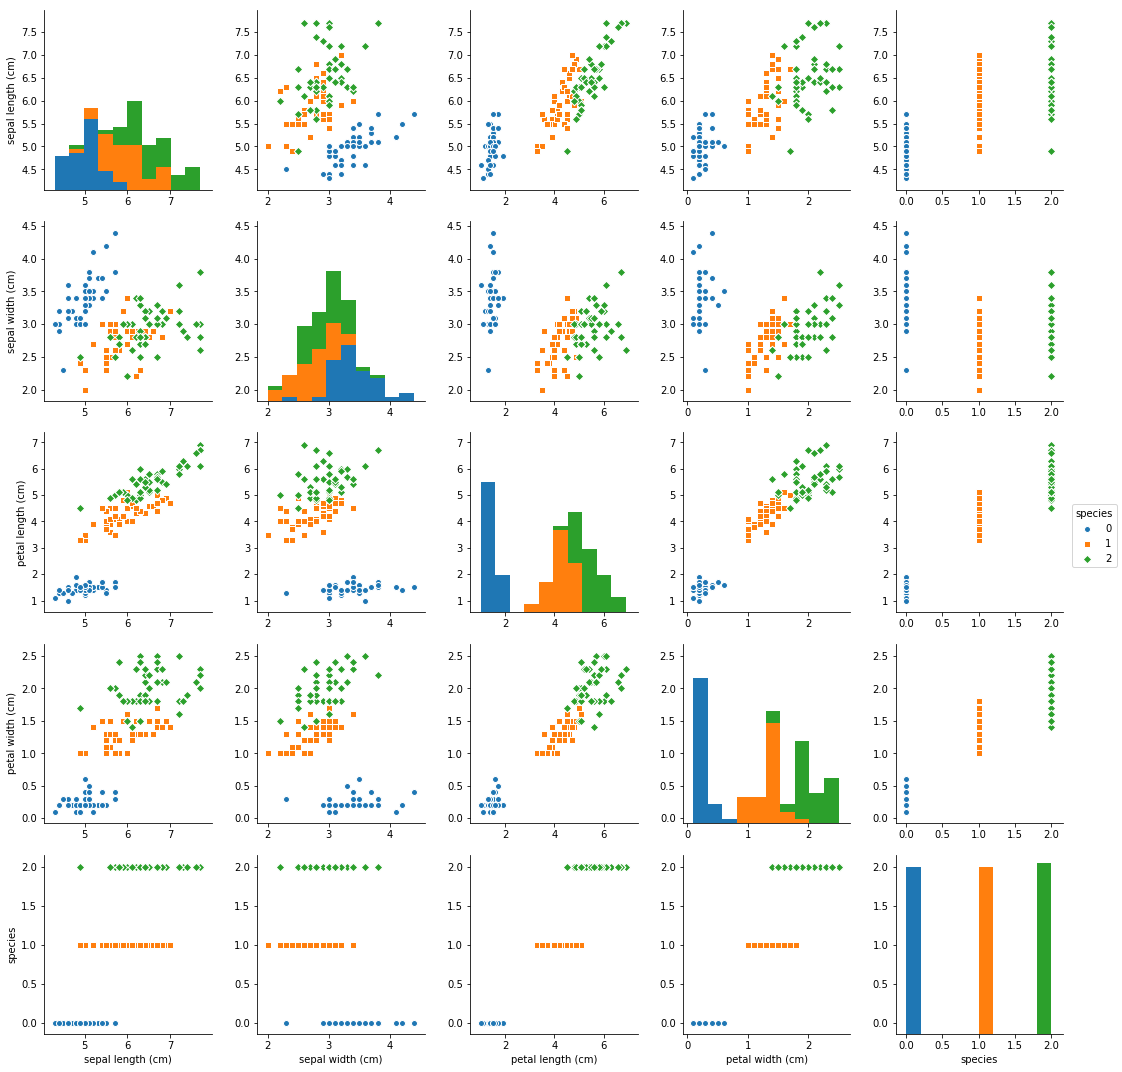

In [35]:
train_df = train_x.copy()
train_df['species'] = train_y
plt.figure()
sns.pairplot(train_df, hue = 'species', size=3, markers=["o", "s", "D"])
plt.show()

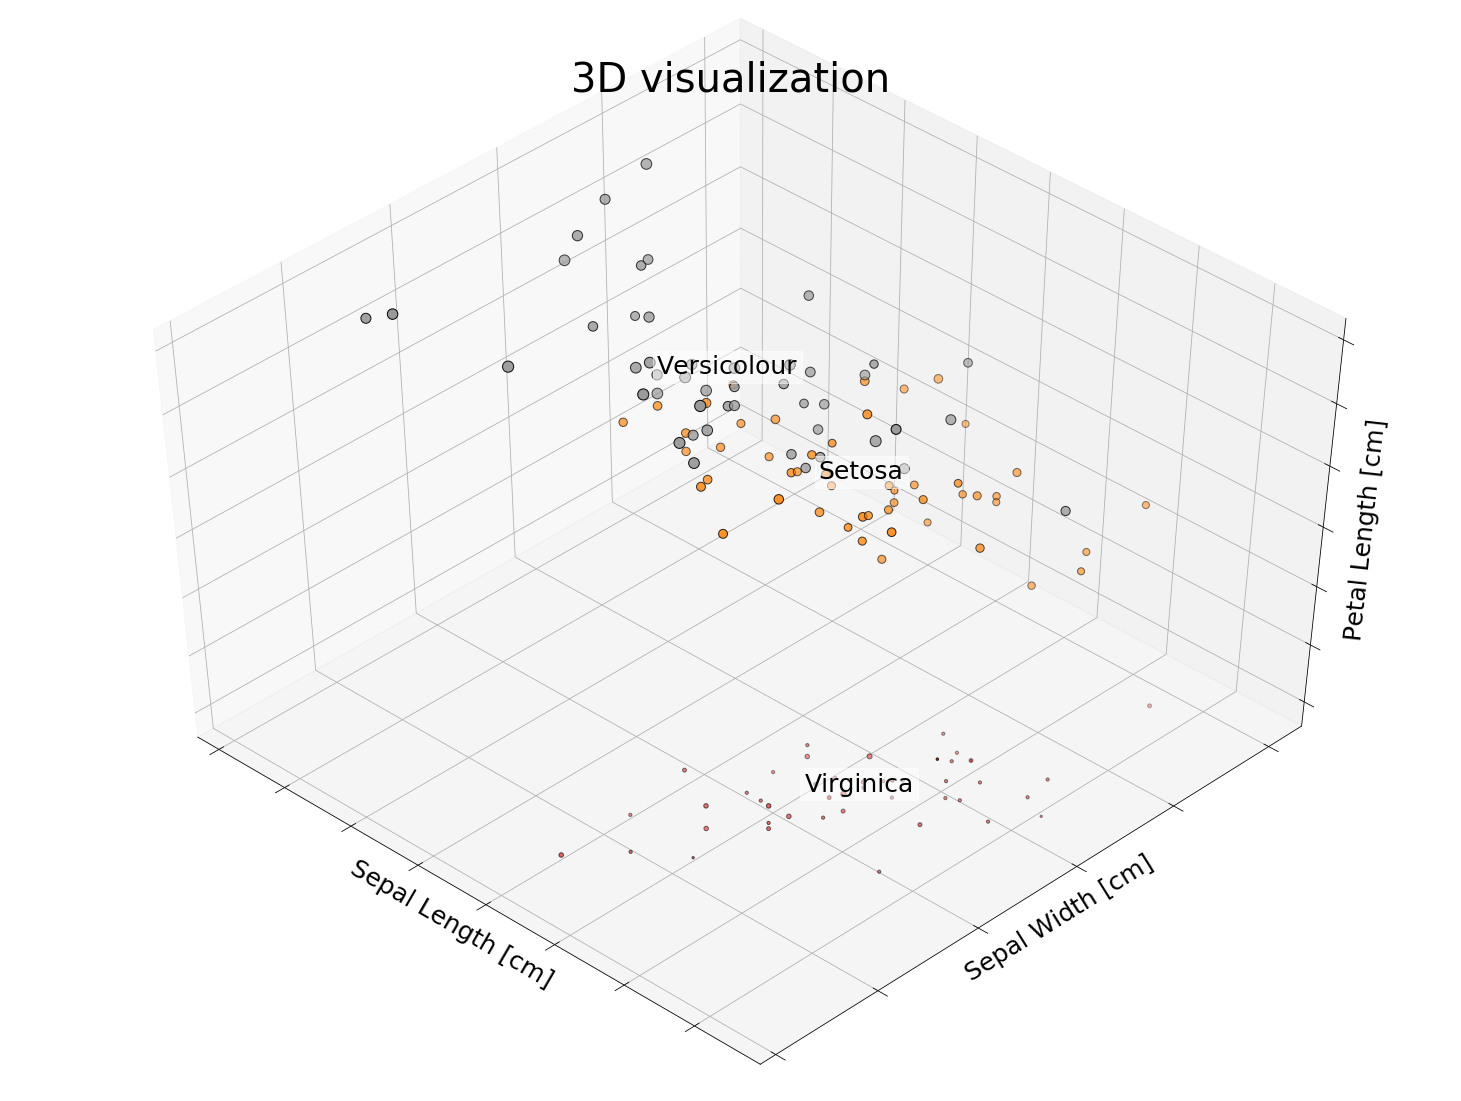

In [39]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X.iloc[:, 3]*50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X.iloc[y == label, 0].mean(),
              X.iloc[y == label, 1].mean(),
              X.iloc[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

In [40]:
###### Classification
# importing dependencies for job
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [44]:
# Instantiate learning model (k = 5)
classifier = KNeighborsClassifier(n_neighbors = 5)

# Fitting the model
classifier.fit(train_x, train_y)

# Predicting the Test set results
y_pred = classifier.predict(test_x)

[[5 0 0]
 [0 5 0]
 [0 0 4]]


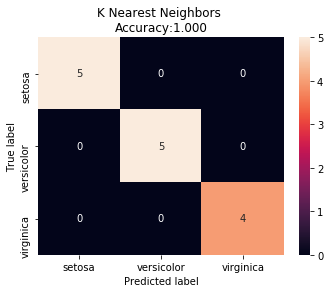

In [48]:
cm = confusion_matrix(test_y, y_pred)
print(cm)
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('K Nearest Neighbors \nAccuracy:{0:.3f}'.format(accuracy_score(test_y, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [52]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_x, train_y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

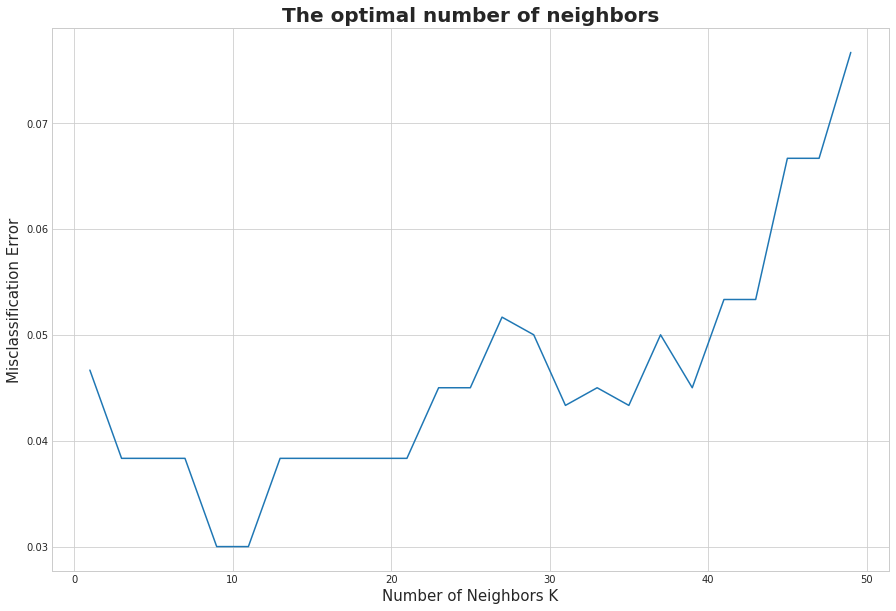

In [53]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [54]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.
